In [6]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from astropy.table import Table

In [79]:
name = 'dpnl_l3.txt'
chain = Table.read(name, format='ascii')

In [81]:
from collections import OrderedDict
w = chain['weight']
cols = chain.colnames[:-3]
means = OrderedDict([(x,(chain[x]*w).sum()/w.sum()) for x in cols])

In [84]:
chain_f = np.array([np.array(chain[c]) for c in cols])

In [85]:
mu = np.array([m for m in means.values()])

In [88]:
d = (chain_f - mu[:,np.newaxis])

In [89]:
# weighted covariance estimate
C = einsum('i,ji,ki->jk', w, d, d)

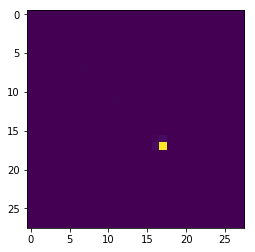

In [90]:
np.savetxt("des_planck_mu.txt", mu)
np.savetxt("des_planck_C.txt", C)
